# <center>Lending Club<br />2018 Loan Datasets<br />Descriptive Statistics</center>

**LendingClub** is an online credit marketplace that enables a borrower to apply for a loan and an investor to select a loan to invest. When a borrower applies for a loan at LendingClub, the company will screen the applicant. If the loan application gets approved, LendingClub will provide the borrower the interest rate for the loan. Once the borrower accepts the loan, the loan is made available for the investors to select. The investor may choose to invest in a whole loan or a fractional part of a loan. 

The purpose of this project is to study the descriptive statistics of the 2018 loan data collected on LendingClub website to provide the company’s prospective investors a thorough insight into the market. This project aims at providing the answer to the following questions:
- **What are the characteristics of fully paid / low risk / medium risk / high risk loans?**

The project first conducts a time series analysis of the issued loans in 2018, then takes a look at frequency distribution of each loan status flag and finally studies the location of the features in the dataset. The loan status flag categorizes loan status into four categories:
- **Fully paid** loans include loans that had been paid off.
- **Low risk** loans include loans that are currently in good standing. Low risk loans could be converted to medium or high risk loans if the borrowers fail to make payment for an extended period of time.
- **Medium risk** loans include loans that are in grace period (1 to 15 days late), late (16 to 30 days), and late (31 to 120 days). Medium risk loans could also be converted to high risk loans if the borrowers stop making payment for 120 days or more.
- **High risk** loans include loans that are charged off and default. Once the loan is charged off, there is no reasonable expectation for the lender to receive sufficient payment from the borrower. For instance, when the borrower files for bankruptcy which discharges the borrower from all unsecured debts like credit card debts, the lender could no longer expect to receive payments from the borrower. Loan default means that the borrower stops making loan payment for an extended period of time.

The data used for this project is a pickle file produced by the data wrangling program. The python notebook for data wrangling program can be found [here](https://github.com/nphan20181/Loan-Default-Prediction/blob/master/loan_data_wrangling.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modules.global_vars as gv             # load user-defined variables
import modules.global_plot_functions as gp   # load user-defined plot functions

pd.set_option('display.max_columns', 150)

In [2]:
df = pd.read_pickle('out/2018_LC_Loans_Cleaned.pkl')  # load cleaned loan data
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_flag,loan_return,earliest_cr_line_year,earliest_cr_line_month,yrs_since_earliest_cr_line,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d_month
0,10000.0,10000.0,60 months,0.1261,225.54,C,C1,4 years,MORTGAGE,80000.0,Source Verified,Mar-2018,Current,n,Home improvement,GA,7.59,0.0,Oct-2006,1.0,17.0,0.0,10710.0,0.377,23.0,w,8054.53,8054.53,3369.09,3369.09,1945.47,1423.62,0.0,0.0,0.0,Jul-2019,225.54,Jul-2019,Jul-2019,0.0,1.0,Individual,0.0,0.0,299196.0,1.0,0.0,0.0,1.0,18.0,0.0,71.0,6.0,12.0,1785.0,38.0,28400.0,2.0,0.0,4.0,13.0,17600.0,4193.0,66.5,0.0,0.0,133.0,137.0,4.0,4.0,2.0,4.0,4.0,2.0,10.0,14.0,10.0,11.0,3.0,16.0,18.0,14.0,17.0,0.0,0.0,0.0,6.0,91.3,40.0,0.0,0.0,388400.0,10710.0,12500.0,0.0,N,N,Low Risk,-5207.29,2006,Oct,11.414334,2019,Jul,2019,Jul,Mar
1,11200.0,11200.0,60 months,0.3079,367.82,G,G1,< 1 year,RENT,44000.0,Not Verified,Mar-2018,Current,n,Medical expenses,NH,43.97,1.0,Jul-2007,2.0,8.0,0.0,1526.0,0.246,14.0,w,9752.03,9752.03,5478.98,5478.98,1447.97,4031.01,0.0,0.0,0.0,Jul-2019,367.82,Jul-2019,Jul-2019,0.0,1.0,Joint App,0.0,0.0,67173.0,1.0,4.0,1.0,4.0,8.0,65647.0,89.0,1.0,1.0,1011.0,84.0,6200.0,8.0,1.0,10.0,5.0,8397.0,632.0,66.7,0.0,0.0,124.0,128.0,5.0,5.0,0.0,34.0,0.0,1.0,2.0,3.0,2.0,3.0,8.0,4.0,6.0,3.0,8.0,0.0,0.0,0.0,2.0,71.4,0.0,0.0,0.0,80367.0,67173.0,1900.0,74167.0,N,N,Low Risk,-1690.01,2007,Jul,10.666886,2019,Jul,2019,Jul,Mar
2,6500.0,6500.0,36 months,0.0607,197.95,A,A2,10+ years,MORTGAGE,50000.0,Not Verified,Mar-2018,Current,n,Debt consolidation,OR,8.66,0.0,Sep-2003,0.0,7.0,0.0,7871.0,0.202,16.0,w,3756.50,3756.50,3153.97,3153.97,2743.50,410.47,0.0,0.0,0.0,Jul-2019,197.95,Aug-2019,Jul-2019,0.0,1.0,Individual,0.0,370.0,243513.0,0.0,1.0,0.0,0.0,32.0,794.0,12.0,0.0,1.0,5467.0,19.0,39000.0,0.0,0.0,0.0,2.0,34788.0,31129.0,20.2,0.0,0.0,158.0,174.0,21.0,21.0,2.0,21.0,6.0,1.0,3.0,3.0,5.0,11.0,2.0,5.0,12.0,3.0,7.0,0.0,0.0,0.0,0.0,93.8,20.0,0.0,0.0,289008.0,8665.0,39000.0,6500.0,N,N,Low Risk,-2935.56,2003,Sep,14.497218,2019,Jul,2019,Jul,Mar
3,25000.0,25000.0,60 months,0.2185,688.35,D,D5,10+ years,MORTGAGE,65000.0,Source Verified,Mar-2018,Current,n,Debt consolidation,AL,12.89,1.0,Mar-1995,1.0,7.0,0.0,8657.0,0.984,16.0,w,21019.97,21019.97,10264.56,10264.56,3980.03,6284.53,0.0,0.0,0.0,Jul-2019,688.35,Jul-2019,Jul-2019,0.0,1.0,Individual,0.0,0.0,74795.0,0.0,2.0,0.0,2.0,16.0,8382.0,82.0,0.0,0.0,3237.0,90.0,8800.0,4.0,3.0,3.0,2.0,10685.0,63.0,98.1,0.0,0.0,69.0,126.0,72.0,16.0,2.0,126.0,0.0,2.0,1.0,3.0,1.0,1.0,4.0,3.0,9.0,3.0,7.0,0.0,0.0,1.0,0.0,75.0,100.0,0.0,0.0,101234.0,17039.0,3300.0,10220.0,N,N,Low Risk,-8450.91,1995,Mar,

In [3]:
df.shape

(495242, 107)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495242 entries, 0 to 495241
Columns: 107 entries, loan_amnt to issue_d_month
dtypes: category(20), float64(80), object(7)
memory usage: 338.2+ MB


## Time Series Analysis

In [5]:
# group data frame by loan's issued month and status
df_loans = df.groupby(['issue_d_month','loan_status_flag'])[['issue_d_month']].count().unstack()['issue_d_month']
df_loans.columns = df_loans.columns.add_categories(['Total Loans'])
df_loans['Total Loans'] = df_loans.sum(axis=1)

# compute monthly loan percentage
for status in gv.LOAN_STATUS_FLAG:
    status_pct = status + ' %'
    df_loans.columns = df_loans.columns.add_categories([status_pct])
    df_loans[status_pct] = round(df_loans[status] * 100 / df_loans['Total Loans'], 2)

### 2018 Monthly Issued Loans

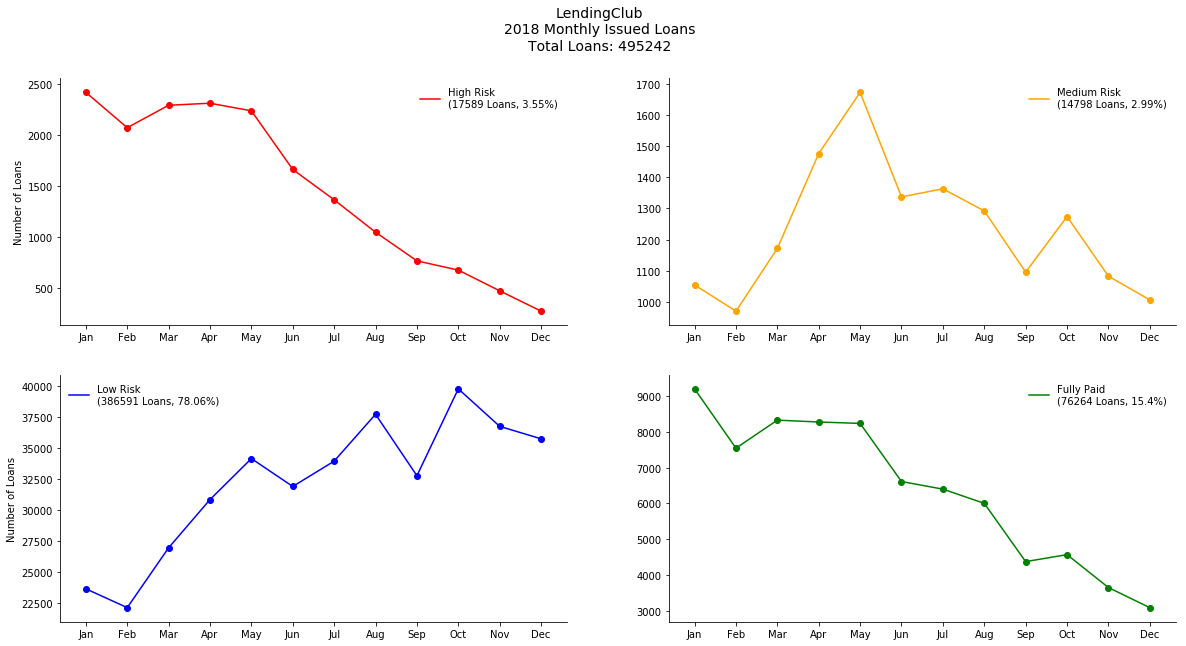

In [6]:
# plot number of loans per month
gp.plot_timeseries(df_loans[gv.LOAN_STATUS_FLAG],
                'LendingClub\n2018 Monthly Issued Loans\nTotal Loans: ' + str(df.shape[0]))

In 2018, LendingClub issued **495,242 loans**. There were:
- 76,264 fully-paid loans (15.4% of total issued loans)
- 386,591 low risk loans (78.06% of total issued loans)
- 14,798 medium risk loans (2.99% of total issued loans)
- 17,589 high risk loans (3.55% of total issued loans)

The time series plots indicate the followings:
- The number of **Fully Paid** loans were high at the start of 2018. It then decreased toward of the end of the year. The overall trend of fully paid loans was downward in 2018.
- The number of **Low Risk** loans was low at the start of 2018. It increased until May and then went up and down until the end of the year. The overall trend of low risk loans was upward in 2018.
- The number of **Medium Risk** loans was low at the start of 2018. It then increased until May and decreased toward the end of the year.
- The number of **High Risk** loans was high at the start of 2018. It then decreased toward the end of the year. The overall trend of high risk loans was downward in 2018.

### Monthly Loan Status Flag Percentage

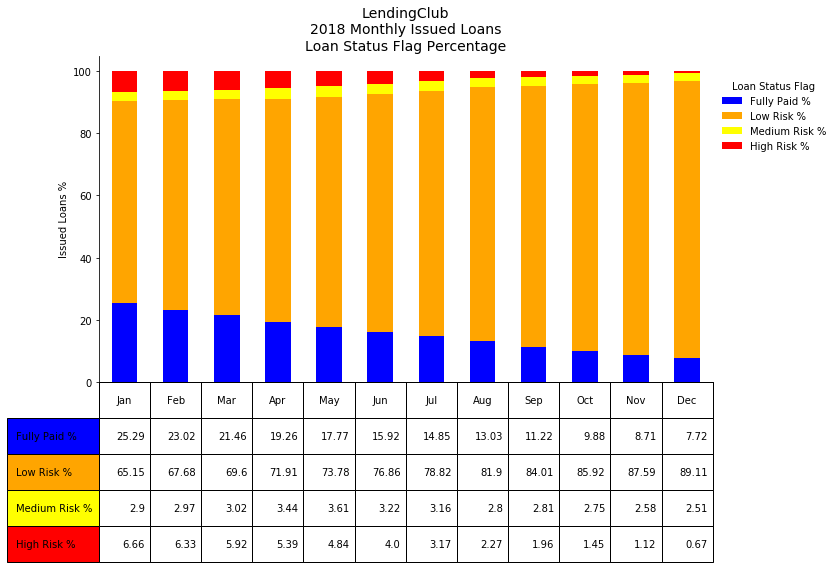

In [7]:
gp.plot_stacked_bar(df_loans.iloc[:,-4:], '2018 Monthly Issued Loans\nLoan Status Flag Percentage')

The Monthly Loan Status Flag Percentage plot shows the ratio of each loan status flag for each month in 2018 for the purpose of comparing the number of issued loans in one loan status flag against the others, i.e., Fully-Paid vs. Low/Medium/High Risk loans. The plot indicates the followings:
- **Low Risk** loans had highest monthly issued-loans percentage in 2018. The low risk loans percentage was increasing toward the end of the year.
- **Fully Paid** loans had the second highest monthly issued-loans percentage in 2018. The fully-paid loans percentage was decreasing toward the end of the year.
- **Medium Risk** loans percentage tends to stay almost the same throughout the year.
- **High Risk** loans percentage tends to decreasing toward the end of the year.

## Frequency Distribution

In [8]:
# get a list of categorical columns for plotting
cat_cols_excluded = ['earliest_cr_line_year', 'earliest_cr_line_month', 'last_pymnt_d_month', 'loan_status_flag',
                     'last_credit_pull_d_month', 'issue_d_month', 'addr_state', 'sub_grade', 'loan_status']
cat_cols = list(set(list(df.select_dtypes(include=['category']).columns)) - set(cat_cols_excluded))

# store column's name by the number of unique values in the column
dict_cat_cols = dict()  # {number of unique values: [name of column]}
for col in cat_cols:
    key = str(len(df[col].unique()))  # get number of unique values
    if key in dict_cat_cols.keys():
        dict_cat_cols.get(key).append(col)
    else:
        dict_cat_cols.update({key: [col]})

### Issued Loans Frequency Distribution

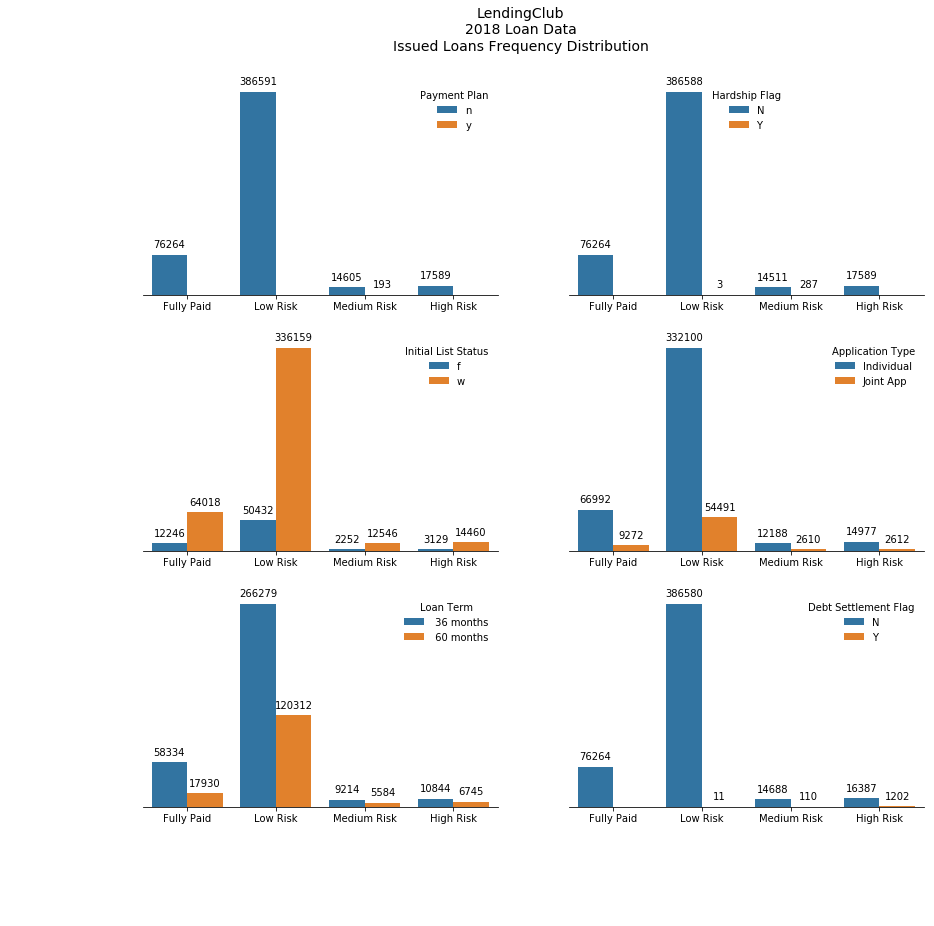

In [9]:
gp.frequency_plot(df, dict_cat_cols.get('2'), 2, 14, 13)

Most loans in all loan status flags had:
- individual application type
- no payment plan
- 36-months term
- hardship flag's value of "No"
- debt settlement flag's value of "No"
- whole loan investment (initial list status = 'w')

The frequency plots also indicate the followings:
- Only **Medium Risk** loans had payment plan (193 loans).
- **Fully Paid** loans did not have any debt settlment flag with a value of "Yes".
- **Fully Paid** and **High Risk** loans did not have any hardship flag with a value of "Yes".

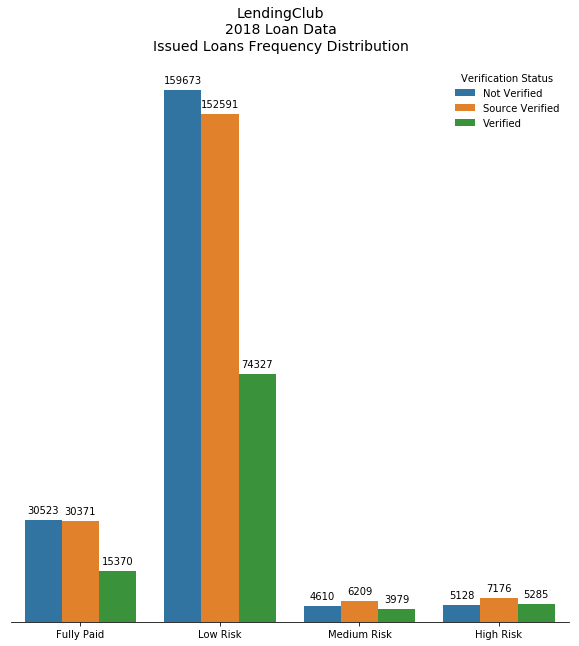

In [10]:
gp.frequency_plot(df, dict_cat_cols.get('3'), w=10, h=10)

- Most **Fully Paid** and **Low Risk** loans had income "not verified" and "source verified".
- Most **Medium Risk** and **High Risk** loans had income "source verified".

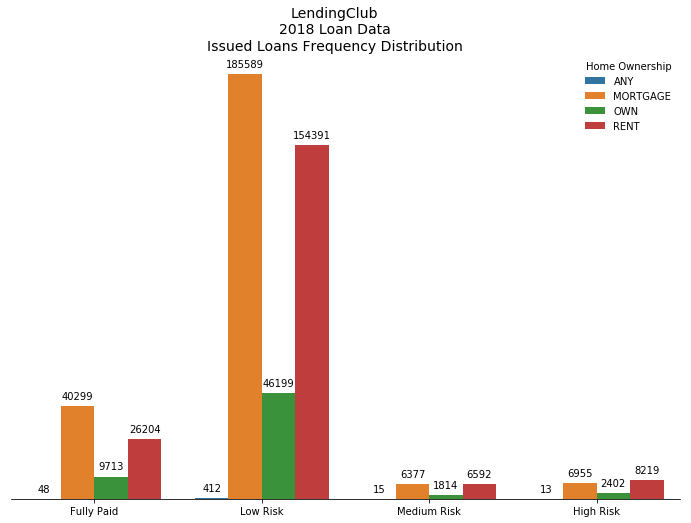

In [11]:
gp.frequency_plot(df, dict_cat_cols.get('4'), w=12, h=8)

- Most **Fully Paid** and **Low Risk** loans had home ownership of mortgage.
- Most **Medium Risk** loans had home ownership of mortgage or rent.
- Most **High Risk** loans had home ownership of rent.

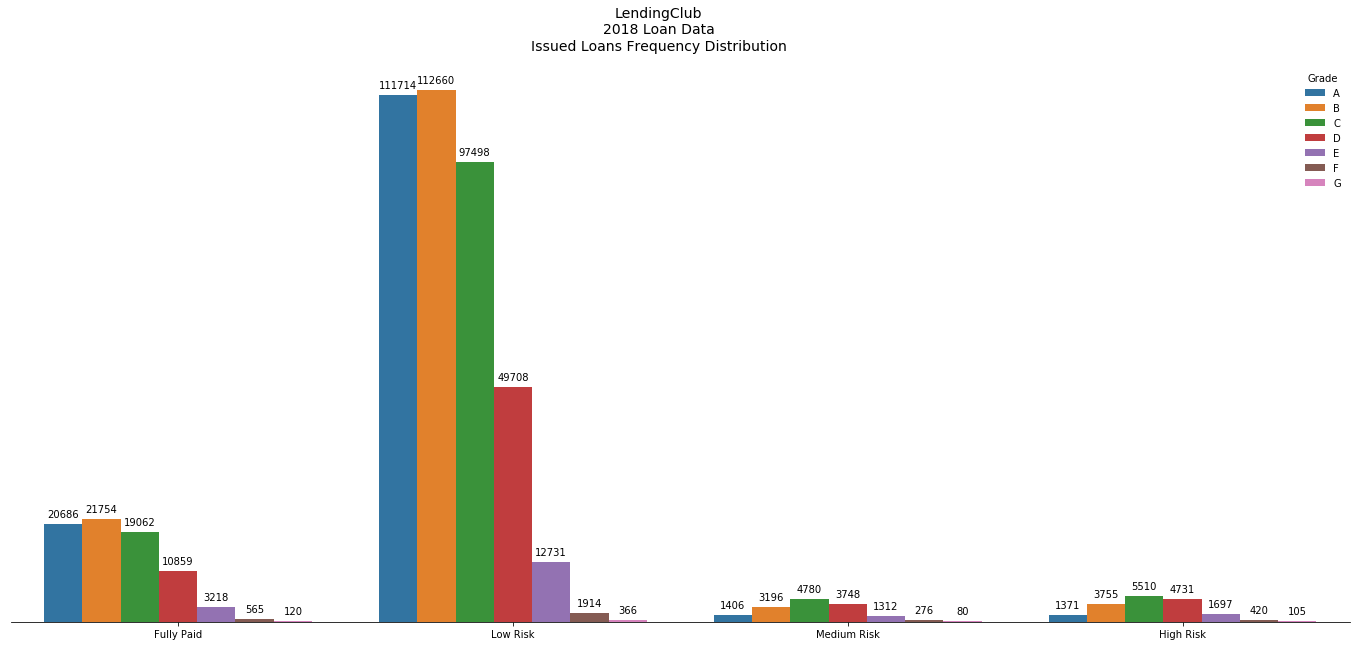

In [12]:
gp.frequency_plot(df, dict_cat_cols.get('7'), w=24, h=10)

- Most **Fully Paid** and **Low Risk** loans had grade A, B, or C.
- Most **Medium Risk** and **High Risk** loans had grade C or D.

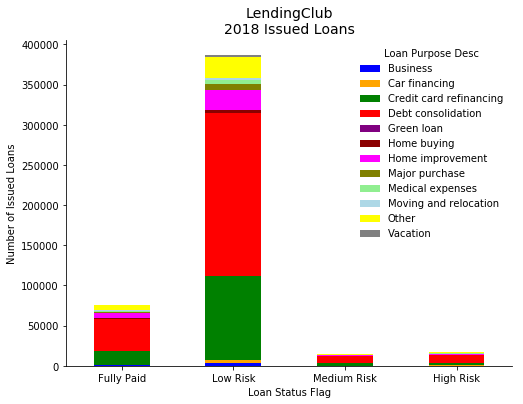

In [13]:
# plot frequency distribution for loan status flag and loan purpose
fig, ax = plt.subplots(figsize=(8, 6))
title_group = df.groupby(['loan_status_flag', 'title'])[['title']].count().unstack()['title']
title_group.plot.bar(stacked=True, ax=ax, 
                     color=['blue', 'orange', 'green', 'red', 'purple', 'darkred', 'magenta', 
                            'olive', 'lightgreen', 'lightblue', 'yellow', 'gray'])

# format plot
gp.hide_borders(ax, ['top', 'right'])
plt.xticks(rotation='horizontal')
plt.xlabel('Loan Status Flag')
plt.ylabel('Number of Issued Loans')
plt.legend(title=gv.VARS_DESC.get('title'), frameon=False)
plt.title('LendingClub\n2018 Issued Loans', fontsize=14)
plt.show()

Most loans in all loan status flags had loan purpose of debt consolidation.

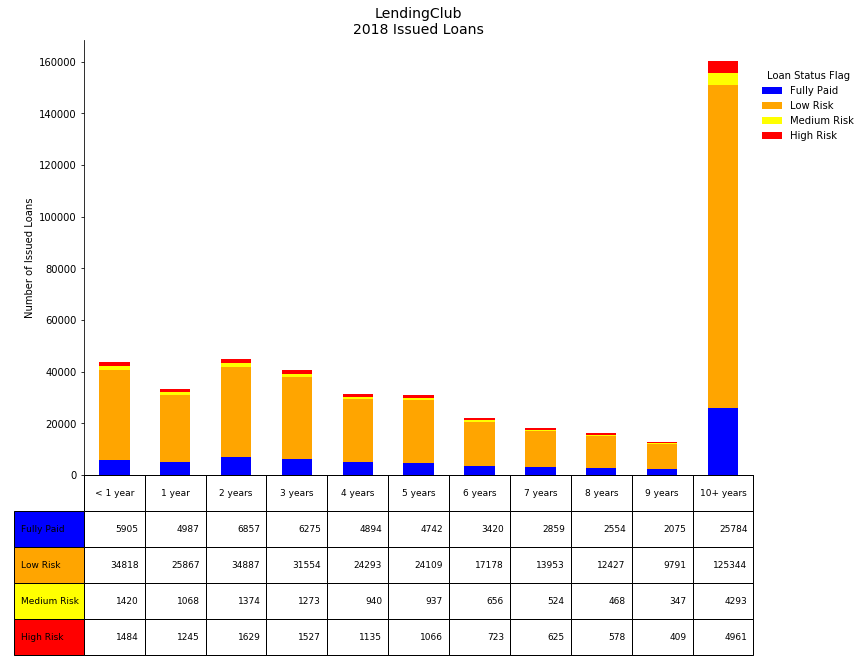

In [14]:
emp_length_group = df.groupby(['loan_status_flag', 'emp_length'])[['emp_length']].count().unstack()['emp_length'].T
gp.plot_stacked_bar(emp_length_group, '2018 Issued Loans', fsize=(12, 8), ylabel='Number of Issued Loans')

Most loans in all loan status flag had employment length of 10+ years.

## Location of Data

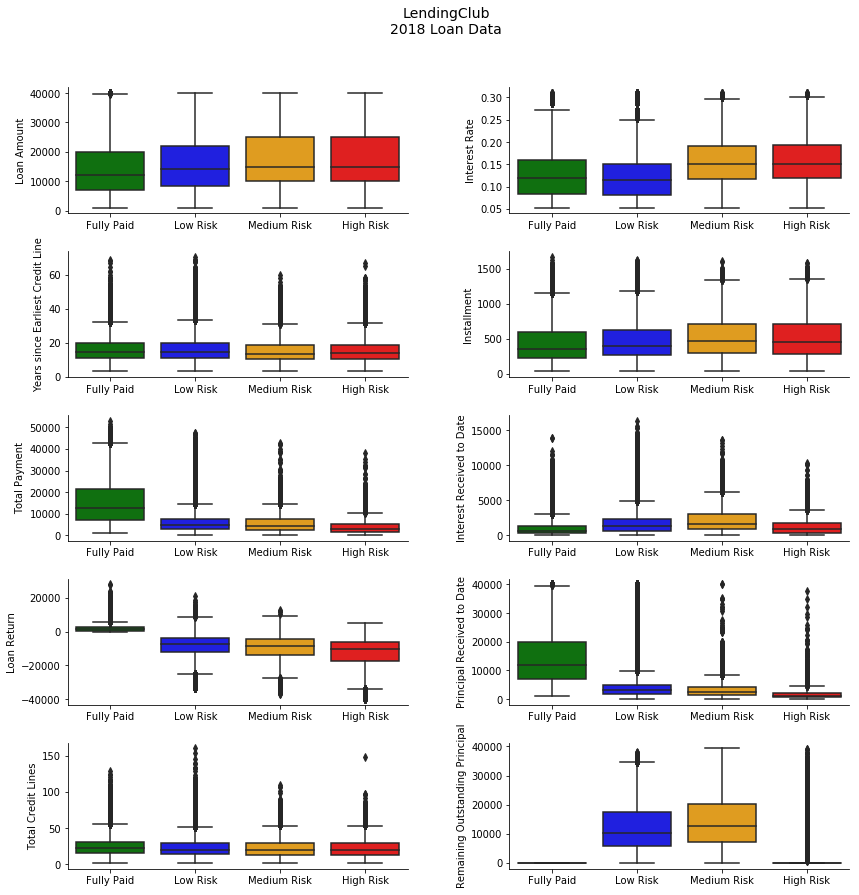

In [15]:
# box plots - location of data
y_cols = ['loan_amnt', 'int_rate', 'yrs_since_earliest_cr_line', 'installment', 'total_pymnt', 
          'total_rec_int', 'loan_return', 'total_rec_prncp', 'total_acc', 'out_prncp']

cols = 2
rows = int(len(y_cols)/cols)
fig, ax = plt.subplots(figsize=(14, 14), nrows=rows, ncols=cols)
y_index = -1
for r in range(rows):
    for c in range(cols):
        y_index += 1
        g = sns.boxplot(x="loan_status_flag", y=y_cols[y_index], data=df, ax=ax[r, c], palette=gv.STATUS_FLAG_COLORS)
        gp.hide_borders(ax[r, c], ['top', 'right'])   # hide top and right borders
        ax[r, c].set_xlabel('')
        ax[r, c].set_ylabel(gv.VARS_DESC.get(y_cols[y_index]))

plt.suptitle('LendingClub\n2018 Loan Data', fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

Most loans in all statuses tend to have the same inter quartile range for:
- Years since earliest credit line
- Total credit lines

The box plots also indicate the followings:
- **Fully Paid** loans had no data for remaining outstanding principal.
- All **High Risk** loans had extreme value for remaining outstanding principal.
- Most **Fully Paid** loans had
  - lower inter quartile range for loan amount, monthly installment, interest received to date.
  - higher inter quartile range for total payment, loan return, and principal received to date. 
  - more variation in the data for total payment and principal received to date.
- Most **Medium Risk** and **High Risk** loans had
  - higher inter quartile range for loan amount, interest rate, and monthly installment.
- Most **High Risk** loans had
  - lower inter quartile range for total payment, loan return, and principal received to date.